In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

data = pd.read_csv('bitcoin_train.csv')
y = data.iloc[:545,4].values 
data = data.drop(columns=['date'])
#data = data[data.columns[[3, 1, 20, 27, 2, 0, 34, 14,]]]
#data["volatility"] = (data['high'] - data['low']) / data['open']
#data["vol_cap_ratio"] = (data['volume'] / data['marketcap']) * 100
#data['high'] = 2*(data['high']- data['close'])/(data['high']-data['low'])-1
#data = data.drop(columns=['usd_jpy', 'usd_cny','low','silver','platinum','VIX','high','open','marketcap','volume', 'cost_per_TXN', 'wiki_page_views'])
data.head()


,open,high,low,close,volume,marketcap,google_trends,wiki_page_views,twitter_followers_growth,gold,...,hash_rate,avg_block_size,difficulty,num_unique_addr,miners_revenue,est_TXN_vol,cost_per_TXN,total_TXN_fees,usd_trade_vol,BECI
0,6214.22,6465.51,6214.22,6404.00,4543860224,1.060000e+11,7.0,14229,292,1250.45,...,38112980.76,0.746513,5.080000e+12,453050,1.123672e+07,656285943.9,57.609894,163181.8222,414797814.1,71.124321
1,5898.13,6261.66,5835.75,6218.30,3966230016,1.010000e+11,8.0,14125,311,1250.45,...,39627403.83,0.689430,5.080000e+12,396405,1.205269e+07,703945479.4,65.127555,166798.5735,262900494.4,71.124321
2,6153.16,6170.41,5873.05,5903.44,3467800064,1.050000e+11,6.0,18577,582,1251.55,...,30540865.37,1.088043,5.080000e+12,397865,9.288788e+06,795615808.3,50.289212,197368.2529,345979167.6,71.124321
3,6084.40,6180.00,6052.85,6157.13,3296219904,1.040000e+11,6.0,17169,518,1254.60,...,36850961.53,1.067592,5.080000e+12,410397,1.139519e+07,609799528.3,59.349571,201953.0378,363193880.4,71.124321
4,6253.55,6290.16,6093.67,6093.67,3279759872,1.070000e+11,6.0,17085,559,1260.30,...,39627403.83,0.920948,5.080000e+12,415602,1.209255e+07,675604827.0,61.446716,213583.5164,501623219.9,71.124321


In [48]:
X_transform.shape

(545, 38)

/Users/aurelius/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


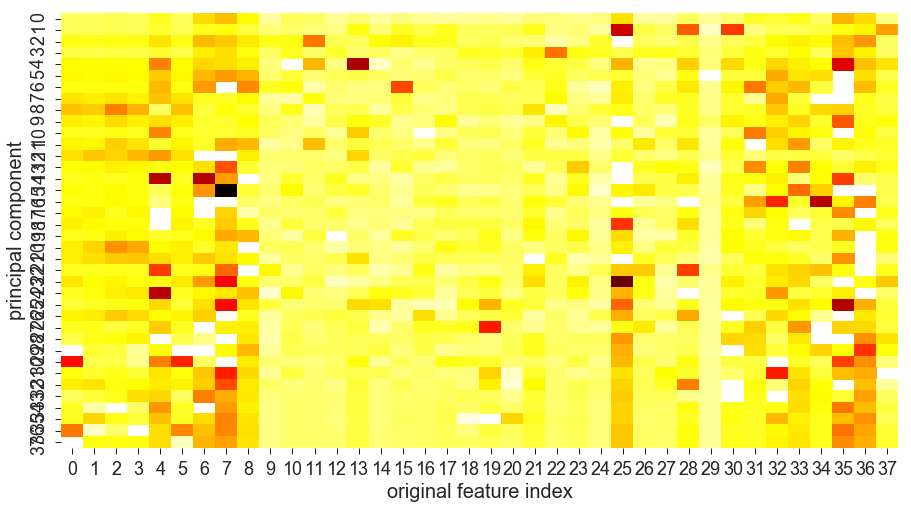

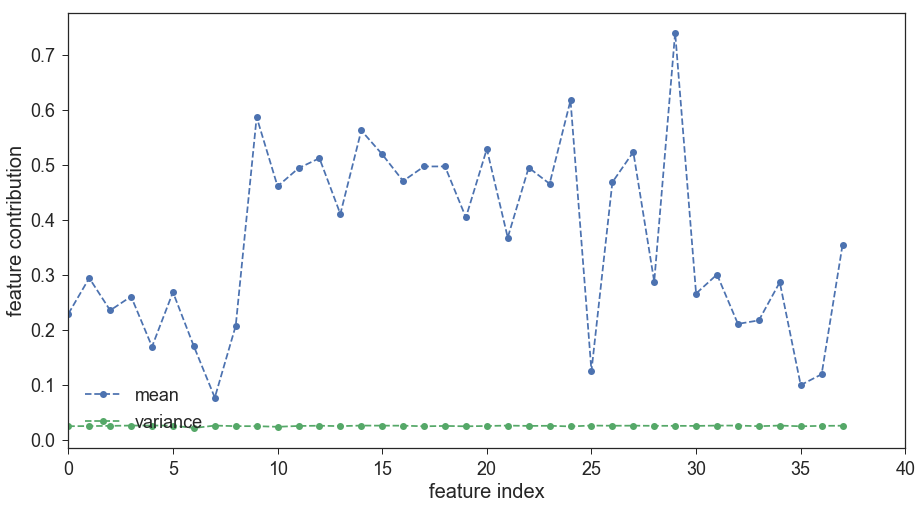

In [60]:
from  sklearn.decomposition import PCA

n_comp =38
pca_trafo = PCA(n_components=n_comp)
pca_data = pca_trafo.fit_transform(X_transform)
pca_inv_data = pca_trafo.inverse_transform(np.eye(n_comp))

fig = plt.figure(figsize=(15, 8))
sns.heatmap(np.log(pca_trafo.inverse_transform(np.eye(n_comp))), cmap="hot", cbar=False)
plt.ylabel('principal component', fontsize=20);
plt.xlabel('original feature index', fontsize=20);
plt.tick_params(axis='both', which='major', labelsize=18);
plt.tick_params(axis='both', which='minor', labelsize=12);

fig = plt.figure(figsize=(15, 8))
plt.plot(pca_inv_data.mean(axis=0), '--o', label = 'mean')
plt.plot(np.square(pca_inv_data.std(axis=0)), '--o', label = 'variance')
plt.legend(loc='lower right')
plt.ylabel('feature contribution', fontsize=20);
plt.xlabel('feature index', fontsize=20);
plt.tick_params(axis='both', which='major', labelsize=18);
plt.tick_params(axis='both', which='minor', labelsize=12);
plt.xlim([0, 40])
plt.legend(loc='lower left', fontsize=18)

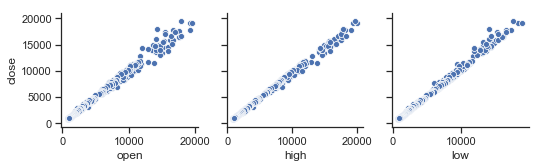

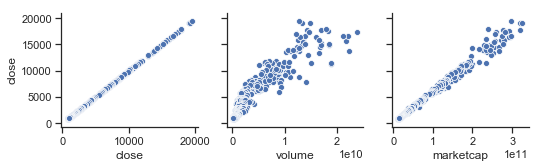

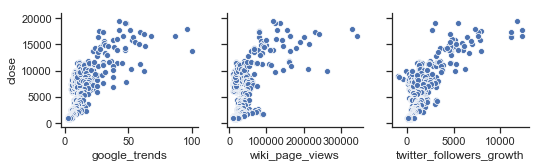

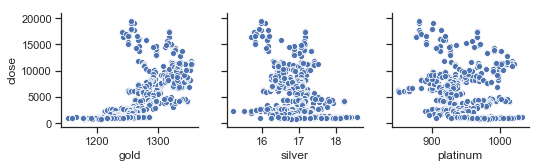

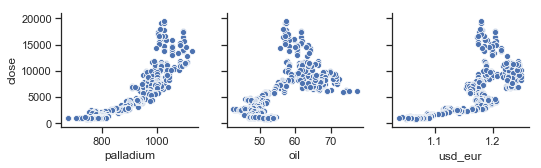

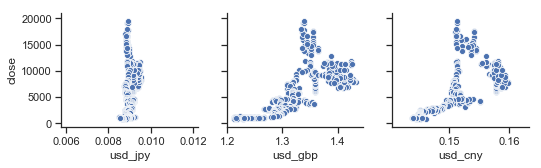

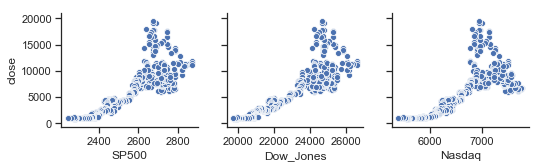

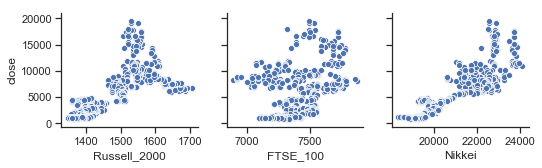

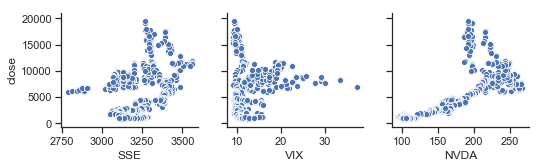

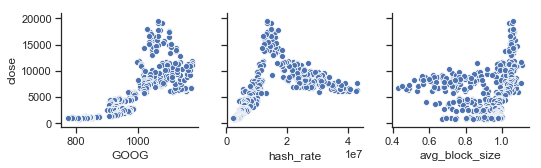

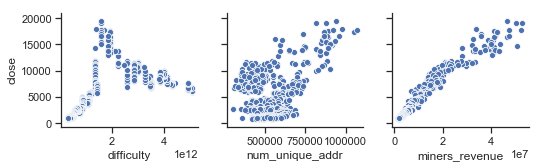

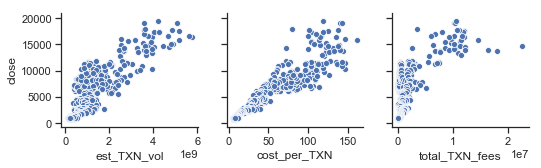

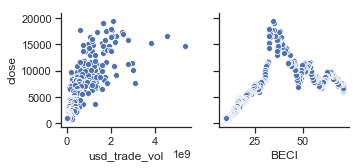

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_context('notebook')
sns.set(style="ticks", color_codes=True)

for i in range(0, len(data.columns), 3):
    sns.pairplot(data=data,
                x_vars=data.columns[i:i+3],
                y_vars=['close'])

In [59]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold 
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler 
from scipy import special
scaler = MinMaxScaler()
X_transform = scaler.fit_transform(data.iloc[1:,:])
poly = PolynomialFeatures(2)
#X = poly.fit_transform(X_transform[:,[2,3,7]])
#X_transform = np.append(X_transform, X, axis=1)
#X_transform.shape

In [56]:

#y = data.iloc[:,4]
# Define a 10 fold model 

#from sklearn.preprocessing import PolynomialFeatures
#poly = PolynomialFeatures(2)
#X = poly.fit_transform(X)
#X_transform = poly.fit_transform(X_transform)

from sklearn.linear_model import ElasticNet, SGDRegressor, LinearRegression, LassoCV, Lasso, Ridge, RidgeCV, BayesianRidge, ARDRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import LinearSVR
import statsmodels.formula.api as sm
import statsmodels.api as smm

best_model = Lasso()
best_rmse = 1e5
best_alpha = -1
best_acc = 0
best_ratio = -1

alphas = np.linspace(0.01,4.15,num=414).tolist()
alphas.extend([0.0000001,0.000001,0.00001,0.0001,0.001])

def train(model,alpha,ratio):
    global best_model
    global best_rmse
    global best_alpha
    global best_acc
    global best_ratio
    rmse = []
    acc = []
    kf = KFold(n_splits=10)
    kf.get_n_splits(X_transform)
    indices = kf.split(X_transform) 
    for train_index, test_index in indices:
        #print('CV ' + str(n))
        X_train = X_transform[train_index]
        y_train = y[train_index]
        X_test = X_transform[test_index]
        y_test = y[test_index]
        model.fit(X_train, y_train) 
        predictions = model.predict(X_test)
        #print('RMSE: '+ str(np.sqrt(mean_squared_error(y_test, predictions))))
        rmse.append(np.sqrt(mean_squared_error(y_test, predictions)))
        
        y_true = y_test.copy()
        y_pred = predictions
        y_true[len(y_true)-1] = 0
        y_pred[len(y_true)-1] = 0
        for i in range(0,len(predictions)-1):
            if y_true[i] >  y_true[i+1]:
                y_true[i] = 1
            elif y_true[i] <=  y_true[i+1]:
                y_true[i] = -1
            if y_pred[i] >  y_pred[i+1]:
                y_pred[i] = 1
            elif y_pred[i] <=  y_pred[i+1]:
                y_pred[i] = -1

        #print(y_pred)
        #print(y_true)
        acc.append(accuracy_score(y_true,y_pred)*100)
    #print('Train RMSE:', str(np.mean(rmse)))
    if np.mean(rmse) < best_rmse:
        best_rmse = np.mean(rmse)
        best_model = model
        best_alpha = alpha
        best_acc = np.mean(acc)
        best_ratio = ratio
    
for alpha in alphas:
    train(Lasso(alpha=alpha),alpha,0)
#for k in range(1,300):
 #   train(KNeighborsRegressor(n_neighbors=k),0,k)
#train(ARDRegression(),alpha,0)

# Remove cny, jpy: Bayesian 412, Lasso(ENET) 334, ARD 366, Ridge 414, LinearReg 417
# Remove multicollinearity: BayesianRidge 378, Lasso(ENET) 328, ARDRegression 347, Ridge 379, LinearRegression 382

print('Best RMSE: ',str(best_rmse))
print('Best Alpha: ',str(best_alpha))
#print('Best K: ',str(best_ratio))
#print('Best Accuracy: ',str(best_acc))

#clf = LassoCV(alphas=alphas,normalize=False)
#clf = ElasticNet(alpha=0.0000001,normalize=True,max_iter=1000)
#clf = Lasso(alpha=0.03,normalize=False)
#clf.fit(X_transform, y) 
#print(clf.alpha_)

#predictions = clf.predict(X_transform[45:97])
#print('Test RMSE: '+ str(np.sqrt(mean_squared_error(y[45:97], predictions))))

Best RMSE:  2791.8091586278033
Best Alpha:  4.15
